# Exercise 5
In this exercise you will use again the dataset in EFIplus_medit.zip to perform some hypothesis testing.

In [32]:
import pandas as pd
import scipy.stats as sts
import seaborn as sns 
import matplotlib.pyplot as plt
import os

df = pd.read_csv(os.getcwd() + '\..\..\Examples\EFIplus_medit.zip', compression='zip', sep=";")

#### 1. Test if the frequency of sites with presence and absence of Salmo trutta fario (Brown Trout) are independent from the country. Please state which is/are the null hypothesis of your test(s).

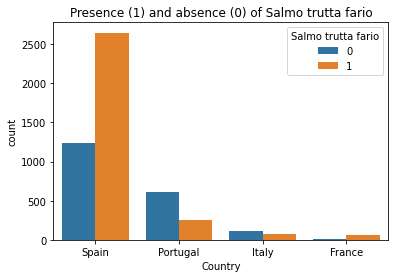

In [2]:
data = df[['Country', 'Salmo trutta fario']]
g = sns.countplot(data, x='Country', hue='Salmo trutta fario', order=data['Country'].value_counts().index)
g.set(title='Presence (1) and absence (0) of Salmo trutta fario')
plt.show()

The countplot already indicates that the variables 'Samo trutta fario' and 'country' might NOT be independent.

Run a **Chi^2 Test** of Independence to determine whether or not there is a significant association between the two variables.

- H_0: *The variables 'Salmo trutta fario' and 'country' are independent*.
- assumed significance level: alpha = 0.05

In [9]:
# prepare a frequency table
freqtable = pd.crosstab(df.Country, df['Salmo trutta fario']) 
# do chi-square test
res = sts.chi2_contingency(freqtable)

alpha = .05
# styling
print(f'Test statistic: {res[0]}, pvalue: {res[1]}, df: {res[2]}, values to be expected if thex were independent: {res[3]}')
if res[1] < alpha: print('--> Reject H_0. The two variables are NOT independent.')
else: print('Do NOT reject H_0. The frequency of presence of salmo trutta fario is independent of the country.')

Test statistic: 496.3723854072799, pvalue: 2.9162328651936495e-107, df: 3, values to be expected if thex were independent: [[  28.39193774   43.60806226]
 [  72.95150669  112.04849331]
 [ 341.88625025  525.11374975]
 [1532.77030533 2354.22969467]]
--> Reject H_0. The two variables are NOT independent.


#### 2. Test whether the means (or medians) of “Actual_river_slope” between presence and absence sites of Salmo trutta fario (Brown Trout) are equal using an appropriate test. Please state which is/are the null hypothesis of your test(s).

sample means: 8.187, 18.100
sample medians: 4.050, 10.700


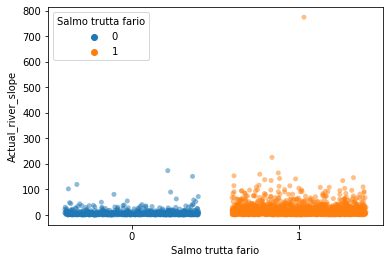

In [51]:
df2 = df.dropna()
data = df2[['Salmo trutta fario','Actual_river_slope']]
sample0 = df2[df2['Salmo trutta fario']==0]['Actual_river_slope']
sample1 = df2[df2['Salmo trutta fario']==1]['Actual_river_slope']
sns.stripplot(data, x='Salmo trutta fario', y='Actual_river_slope', hue='Salmo trutta fario', jitter=.4, alpha=.5)
# sample means/medians:
print('sample means: %.3f, %.3f' % (sample0.mean(), sample1.mean()))
print('sample medians: %.3f, %.3f' % (sample0.median(), sample1.median()))

**Unpaired two-sample t-test (two-tailed)** for equal means.
Assumptions:
- The dependent variable must be continuous (interval/ratio). (+)
- The observations are independent of one another. (+)
- The dependent variable should be approximately normally distributed. (-)
- The dependent variable should not contain any outliers. (-)

Better use non-parametrical **Mann-Whitney-U-test** because data is not normally distributed, but very right-skewed:
- H_0: *The populations have equal medians (m1=m2).*
- alpha: 0.05

In [85]:
stat, p = sts.mannwhitneyu(sample0, sample1, alternative='two-sided')
print('t-stat=%.3f, p-value=%.3f' % (stat, p))

if p < alpha: print('--> Reject H_0. The medians of the two populations are NOT equal.')
else: print('Do NOT reject H_0. The medians of the two populations are equal.')

t-stat=439968.000, p-value=0.000
--> Reject H_0. The medians of the two populations are NOT equal.


#### 3. Test whether there are differences in the mean elevation in the upstream catchment (ELEV_MN_du) among the four most sampled catchments. For which pairs of catchments are these differences significant? Please state which is/are the null hypothesis of your test(s).

One-way ANOVA (Analysis of Variance) test

H_0: *There is no difference in mean elevation between the four catchments.*

Assumptions:
- normality (shapiro wilk test) -
- homogeneity of variances (levense test) -
- independence of observations. 

Index(['Galiza-Norte', 'Minho', 'Cantabrica', 'Douro'], dtype='object', name='Catchment_name')
H0: The Galiza-Norte sample was drawn from a normal distribution.
Statistics=0.943, p=0.000
Galiza-Norte sample NOT normally distributed (reject H0 with an error probability <0.05).
H0: The Minho sample was drawn from a normal distribution.
Statistics=0.957, p=0.000
Minho sample NOT normally distributed (reject H0 with an error probability <0.05).
H0: The Cantabrica sample was drawn from a normal distribution.
Statistics=0.907, p=0.000
Cantabrica sample NOT normally distributed (reject H0 with an error probability <0.05).
H0: The Douro sample was drawn from a normal distribution.
Statistics=0.945, p=0.000
Douro sample NOT normally distributed (reject H0 with an error probability <0.05).


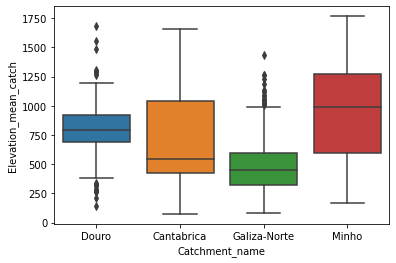

In [64]:
# find the 4 most sampled catchments
df= df.dropna()
top4 = df.groupby(['Catchment_name'])['Site_code'].count().sort_values(ascending=False).head(4).index
print(top4)

data=pd.DataFrame()

sns.boxplot(data=df[df['Catchment_name'].isin(top4)], y='Elevation_mean_catch', x='Catchment_name')

# test for normality
from scipy.stats import shapiro
# samples 
for i, catchment in enumerate(top4):
    data = df[df['Catchment_name']== catchment]['Elevation_mean_catch']
    print(f'H0: The {catchment} sample was drawn from a normal distribution.')
    stat, p = shapiro(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs
    alpha = 0.05
    if p > alpha: print(f'{catchment} sample normally distributed (fail to reject H0. Rejecting H0 has an error probability >0.05)')
    else: print(f'{catchment} sample NOT normally distributed (reject H0 with an error probability <0.05).')

In [68]:
from scipy.stats import levene
data = df[df['Catchment_name'].isin(top4)][['Catchment_name', 'Elevation_mean_catch']]
sample0 = data[data['Catchment_name']=='Douro']['Elevation_mean_catch']
sample1 = data[data['Catchment_name']=='Minho']['Elevation_mean_catch']
sample2 = data[data['Catchment_name']=='Galiza-Norte']['Elevation_mean_catch']
sample3 = data[data['Catchment_name']=='Cantabrica']['Elevation_mean_catch']
#test for homogenity of variances
print('H0: all input samples are from populations with equal variances')
stat, p = levene(sample0, sample1, sample2, sample3, center='median')
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs
alpha = 0.05
if p > alpha: print('samples are from populations with equal variances (fail to reject H0. Rejecting H0 has an error probability >0.05)')
else: print('samples are NOT from populations with equal variances (reject H0 with an error probability <0.05).')

H0: all input samples are from populations with equal variances
Statistics=141.011, p=0.000
samples are NOT from populations with equal variances (reject H0 with an error probability <0.05).


The ANOVA test may not be appropriate because not all samples are normally distributed. In this case, a non-parametric test may be more suitable. Also, the variances of the groups are not equal.

**Kruskal-Wallis test (one-way ANOVA on ranks)**

*H0: The population median of all of the groups are equal.*

In [70]:
stat, p = sts.kruskal(sample0, sample1, sample2, sample3, nan_policy='propagate', axis=0, keepdims=False)
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs
alpha = 0.05
if p > alpha: print('population median of all groups is equal (fail to reject H0. Rejecting H0 has an error probability >0.05)')
else: print('population median NOT equal for all groups (reject H0 with an error probability <0.05).')

Statistics=661.543, p=0.000
population median NOT equal for all groups (reject H0 with an error probability <0.05).


Kruskal Wallis test indicates a significant difference. Post-hoc test to determine which groups differ are required. 

--> Mann-Whitney-U test for each pair

*H0: The populations have equal medians.*

In [87]:
stat, p = sts.mannwhitneyu(sample0, sample1, alternative='two-sided')
print('t-stat=%.3f, p-value=%.3f' % (stat, p))
if p < alpha: print('--> Reject H_0. The medians of the two populations are NOT equal.')
else: print('Do NOT reject H_0. The medians of the two populations are equal.')

stat, p = sts.mannwhitneyu(sample1, sample2, alternative='two-sided')
print('t-stat=%.3f, p-value=%.3f' % (stat, p))
if p < alpha: print('--> Reject H_0. The medians of the two populations are NOT equal.')
else: print('Do NOT reject H_0. The medians of the two populations are equal.')

stat, p = sts.mannwhitneyu(sample2, sample3, alternative='two-sided')
print('t-stat=%.3f, p-value=%.3f' % (stat, p))
if p < alpha: print('--> Reject H_0. The medians of the two populations are NOT equal.')
else: print('Do NOT reject H_0. The medians of the two populations are equal.')

stat, p = sts.mannwhitneyu(sample0, sample2, alternative='two-sided')
print('t-stat=%.3f, p-value=%.3f' % (stat, p))
if p < alpha: print('--> Reject H_0. The medians of the two populations are NOT equal.')
else: print('Do NOT reject H_0. The medians of the two populations are equal.')

stat, p = sts.mannwhitneyu(sample0, sample3, alternative='two-sided')
print('t-stat=%.3f, p-value=%.3f' % (stat, p))
if p < alpha: print('--> Reject H_0. The medians of the two populations are NOT equal.')
else: print('Do NOT reject H_0. The medians of the two populations are equal.')

stat, p = sts.mannwhitneyu(sample1, sample3, alternative='two-sided')
print('t-stat=%.3f, p-value=%.3f' % (stat, p))
if p < alpha: print('--> Reject H_0. The medians of the two populations are NOT equal.')
else: print('Do NOT reject H_0. The medians of the two populations are equal.')

t-stat=77774.000, p-value=0.000
--> Reject H_0. The medians of the two populations are NOT equal.
t-stat=423573.000, p-value=0.000
--> Reject H_0. The medians of the two populations are NOT equal.
t-stat=84430.000, p-value=0.000
--> Reject H_0. The medians of the two populations are NOT equal.
t-stat=169247.000, p-value=0.000
--> Reject H_0. The medians of the two populations are NOT equal.
t-stat=61976.000, p-value=0.000
--> Reject H_0. The medians of the two populations are NOT equal.
t-stat=168864.000, p-value=0.000
--> Reject H_0. The medians of the two populations are NOT equal.


So apparently the medians of all groups differ significantly from each other.

### 4. Which potential problems do you think there are in the data that could limit the conclusions derived from the performed tests?

The data might contain sampling bias. Maybe people only collected data at locations that were easy to reach / that were known to have certain fish / ... / etc., instead of evenly gridded locations or whatever. 

Also, outliers can skew the results of the test and affect the validity of the conclusions.

Additionally there may be other (confounding) factors that affect the examined variables. So the results of the test can be misleading if these factors are not controlled for.

Also, the samples used for the performed tests are of significantly different sizes which can influence and reduce the validity of the test outcomes.

